# 将图片灰度化

In [ ]:
import os
import cv2 as cv

#獲取當前文件夾下的文件
address1 = os.listdir()

#指定輸出文件夾
out_path = 'out/'    #文件夾名為out

#若無該文件夾，則創建
if not os.path.exists(out_path):
    os.mkdir(out_path)

#創建灰度化函數
def gray(img1):
    img = cv.imread(img1,0)
    
    #最鄰近内插法放大圖像到32*32
    new_img = cv.resize(img,(32,32),interpolation=cv.INTER_NEAREST)
    
    # 用otsu算法找到最佳全局阈值后，直接对图像进行二值化处理
    # 0 -> 如果不适用otsu，这这里应该是手动设置的阈值。但是因为要使用otsu所以写0表示不设置
    # 255 -> 二值化处理之后True会被转化成的值。如果写255则True会被转化为255
    thresh_hold, new_img = cv.threshold(img, 0, 255, cv.THRESH_OTSU)
    #將新圖片保存到out文件夾下
    cv.imwrite("./out/"+img1,new_img)
    #cv.imwrite("new_x.png",new_img)
    
for i in address1:
    if ".jpg" not in i:
         continue
    img1 = i
    gray(img1)

# 封装,读取测试实例

In [1]:
import pickle
import numpy as np

x = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

# 直接把 x 以二进制的形式 写到文件: x_temp中
with open("x_temp", 'wb') as f:
   pickle.dump(x, f)
   
#########################################
# 注意: dump 和 Load 连续运行是为了方便演示
#########################################

# 以二进制的形式把 x_temp 中保存的对象读入
with open("x_temp", 'rb') as f:
   x2 = pickle.load(f)

print(x2)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


(299,)


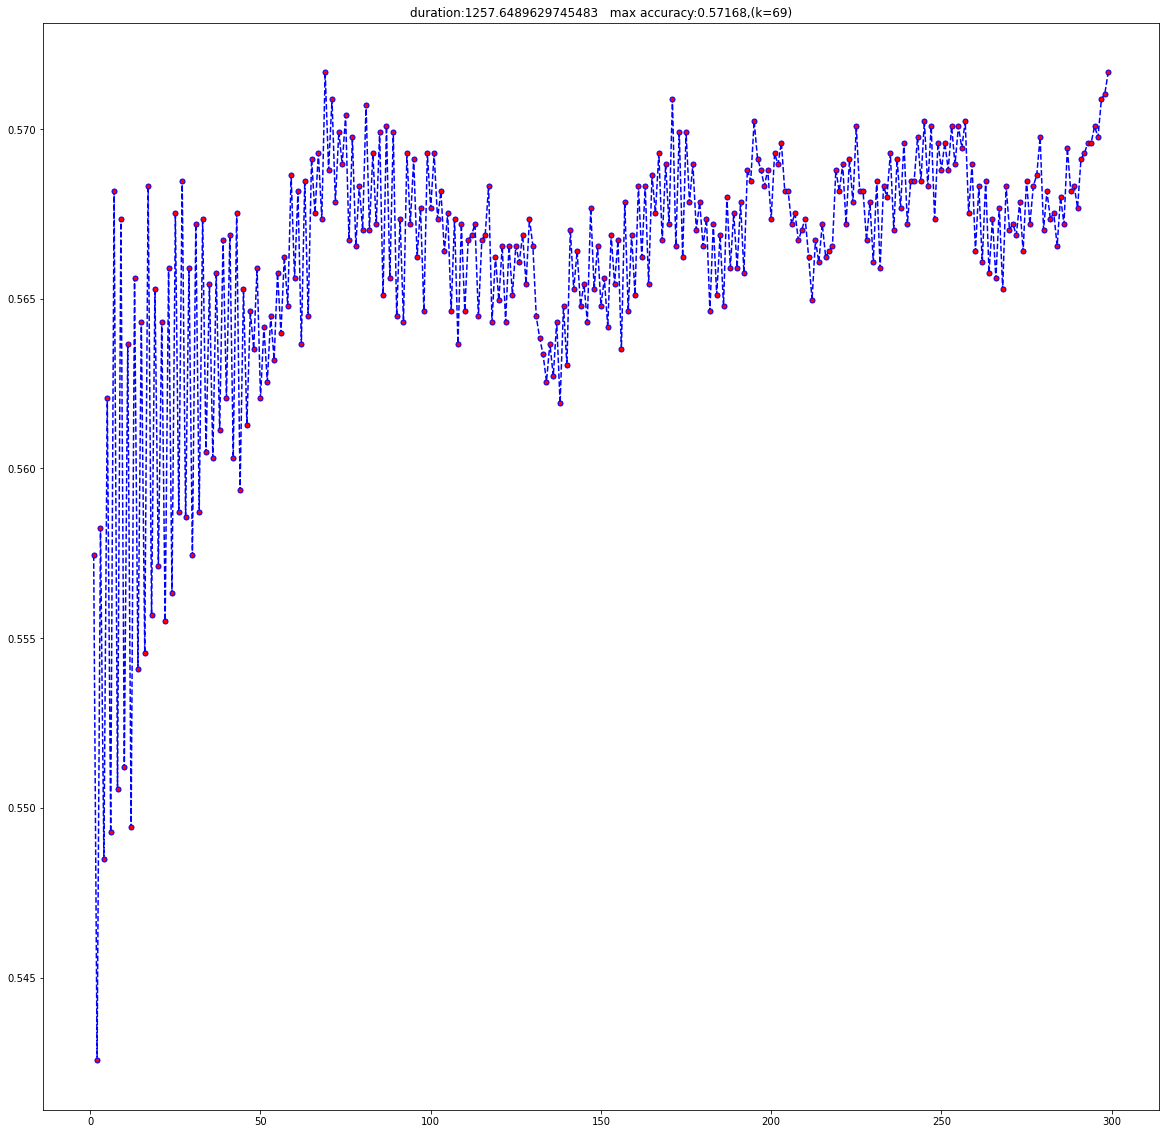

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import cv2 as cv
import pickle
import time

#獲取當前文件夾下的文件
address = os.listdir()

#計時開始
start = time.time()

X=[]
y=[]

#获取数据
for i in address:
    if ".jpg"  in i:
        img = cv.imread(i)
        img=cv.resize(img,(32,32),interpolation=cv.INTER_NEAREST)
        img = img.ravel()
        X.append(img)
    if 'cat' in i:
        y.append('cat')
    if 'dog' in i:
        y.append('dog')
            
#封装数据        
with open("X", 'wb') as f:
    pickle.dump(X, f)
with open("y",'wb') as l:
    pickle.dump(y,l)

# 以二进制的形式把 X,y 中保存的对象读入
with open("X", 'rb') as f:
    X = pickle.load(f)
with open("y", 'rb') as f:
    y = pickle.load(f)

#划分数据集
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

#创建knn模型
K = np.arange(1,300)

PredictList = []

for i in K:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    
    #封装knn
    with open("knn",'wb') as l:
        pickle.dump(knn,l)

    # 5. 获得算法的准确率
    acc=knn.score(X_test,y_test) # <--- 判断此knn模型的准确率
    #print("当K=",K,"的时候此knn模型的准确率为",acc)
    PredictList.append(acc)

PredictList = np.array(PredictList)
print(PredictList.shape)

#繪圖
fg,ax =plt.subplots(figsize=(20,20))
#plt.style.use('seaborn')   # 使用美化的seaborn风格
plt.plot(K,PredictList,
        linestyle='dashed', color='blue', 
        marker='o',markerfacecolor='red', markersize=5)

#聯合K和PredictList
link = pd.Series(PredictList,index = K)
#尋找最大值及對應坐標
def MAX(link):
    for IndexValues in link.index.values:
        if link[IndexValues] == link.max():
            return IndexValues,link.max()
In,Va = MAX(link)
#plt.axvline(x=In,ymin=0, ymax=Va,linewidth=1, color='#4798b3')
#plt.text(In, Va,f'K={In},acc={Va}')

#封装数据        
with open("X_train", 'wb') as f:
    pickle.dump(X_train, f)
with open("knn",'wb') as l:
    pickle.dump(knn,l)

#計時結束
end = time.time()

#用時
times = end - start

    
plt.title(f'duration:{times}   max accuracy:{Va},(k={In})')
plt.show()

#保存成pdf格式
fg.savefig('acc_300.pdf')